In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

* Dataset includes 30 rows and 17 features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


1] All variables are numeric datatype

2] ERA feature is float dtype

* Analysis of missing records

In [6]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df.isna().sum().sum()

0

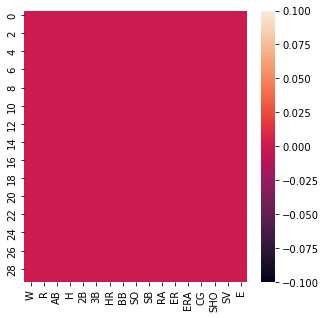

In [8]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1] W feature Observations :

    1] Average of  W feature is 80.96666666666667

    2] Minimum of  W feature is 63

    3] Maximum of  W feature is 100

    3] Median of  W feature is 81.0

____________________________________________________________
2] R feature Observations :

    1] Average of  R feature is 688.2333333333333

    2] Minimum of  R feature is 573

    3] Maximum of  R feature is 891

    3] Median of  R feature is 689.0

____________________________________________________________
3] AB feature Observations :

    1] Average of  AB feature is 5516.266666666666

    2] Minimum of  AB feature is 5385

    3] Maximum of  AB feature is 5649

    3] Median of  AB feature is 5510.0

____________________________________________________________
4] H feature Observations :

    1] Average of  H feature is 1403.5333333333333

    2] Minimum of  H feature is 1324

    3] Maximum of  H feature is 1515

    3] Median of  H feature is 1382.5

____________________________________________________________
5] 2B feature Observations :

    1] Average of  2B feature is 274.73333333333335

    2] Minimum of  2B feature is 236

    3] Maximum of  2B feature is 308

    3] Median of  2B feature is 275.5

____________________________________________________________
6] 3B feature Observations :

    1] Average of  3B feature is 31.3

    2] Minimum of  3B feature is 13

    3] Maximum of  3B feature is 49

    3] Median of  3B feature is 31.0

____________________________________________________________
7] HR feature Observations :

    1] Average of  HR feature is 163.63333333333333

    2] Minimum of  HR feature is 100

    3] Maximum of  HR feature is 232

    3] Median of  HR feature is 158.5

____________________________________________________________
8] BB feature Observations :

    1] Average of  BB feature is 469.1

    2] Minimum of  BB feature is 375

    3] Maximum of  BB feature is 570

    3] Median of  BB feature is 473.0

____________________________________________________________
9] SO feature Observations :

    1] Average of  SO feature is 1248.2

    2] Minimum of  SO feature is 973

    3] Maximum of  SO feature is 1518

    3] Median of  SO feature is 1261.5

____________________________________________________________
10] SB feature Observations :

    1] Average of  SB feature is 83.5

    2] Minimum of  SB feature is 44

    3] Maximum of  SB feature is 134

    3] Median of  SB feature is 83.5

____________________________________________________________
11] RA feature Observations :

    1] Average of  RA feature is 688.2333333333333

    2] Minimum of  RA feature is 525

    3] Maximum of  RA feature is 844

    3] Median of  RA feature is 695.5

____________________________________________________________
12] ER feature Observations :

    1] Average of  ER feature is 635.8333333333334

    2] Minimum of  ER feature is 478

    3] Maximum of  ER feature is 799

    3] Median of  ER feature is 644.5

____________________________________________________________
13] ERA feature Observations :

    1] Average of  ERA feature is 3.9563333333333337

    2] Minimum of  ERA feature is 2.94

    3] Maximum of  ERA feature is 5.04

    3] Median of  ERA feature is 4.025

____________________________________________________________
14] CG feature Observations :

    1] Average of  CG feature is 3.466666666666667

    2] Minimum of  CG feature is 0

    3] Maximum of  CG feature is 11

    3] Median of  CG feature is 3.0

____________________________________________________________
15] SHO feature Observations :

    1] Average of  SHO feature is 11.3

    2] Minimum of  SHO feature is 4

    3] Maximum of  SHO feature is 21

    3] Median of  SHO feature is 12.0

____________________________________________________________
16] SV feature Observations :

    1] Average of  SV feature is 43.06666666666667

    2] Minimum of  SV feature is 28

    3] Maximum of  SV feature is 62

    3] Median of  SV feature is 42.0

____________________________________________________________
17] E feature Observations :

    1] Average of  E feature is 94.33333333333333

    2] Minimum of  E feature is 75

    3] Maximum of  E feature is 126

    3] Median of  E feature is 91.0

____________________________________________________________

* Analysis of missing values with Heatmap

<AxesSubplot:>

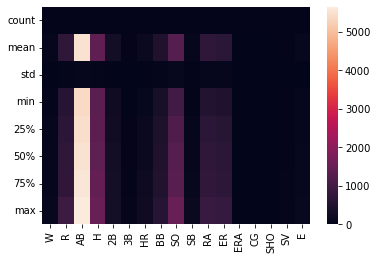

In [10]:
sns.heatmap(df.describe())

1] Missing values are not observe in dataset.


2] Scaling required in data as features having different range

* Analysis  of Distribution of features

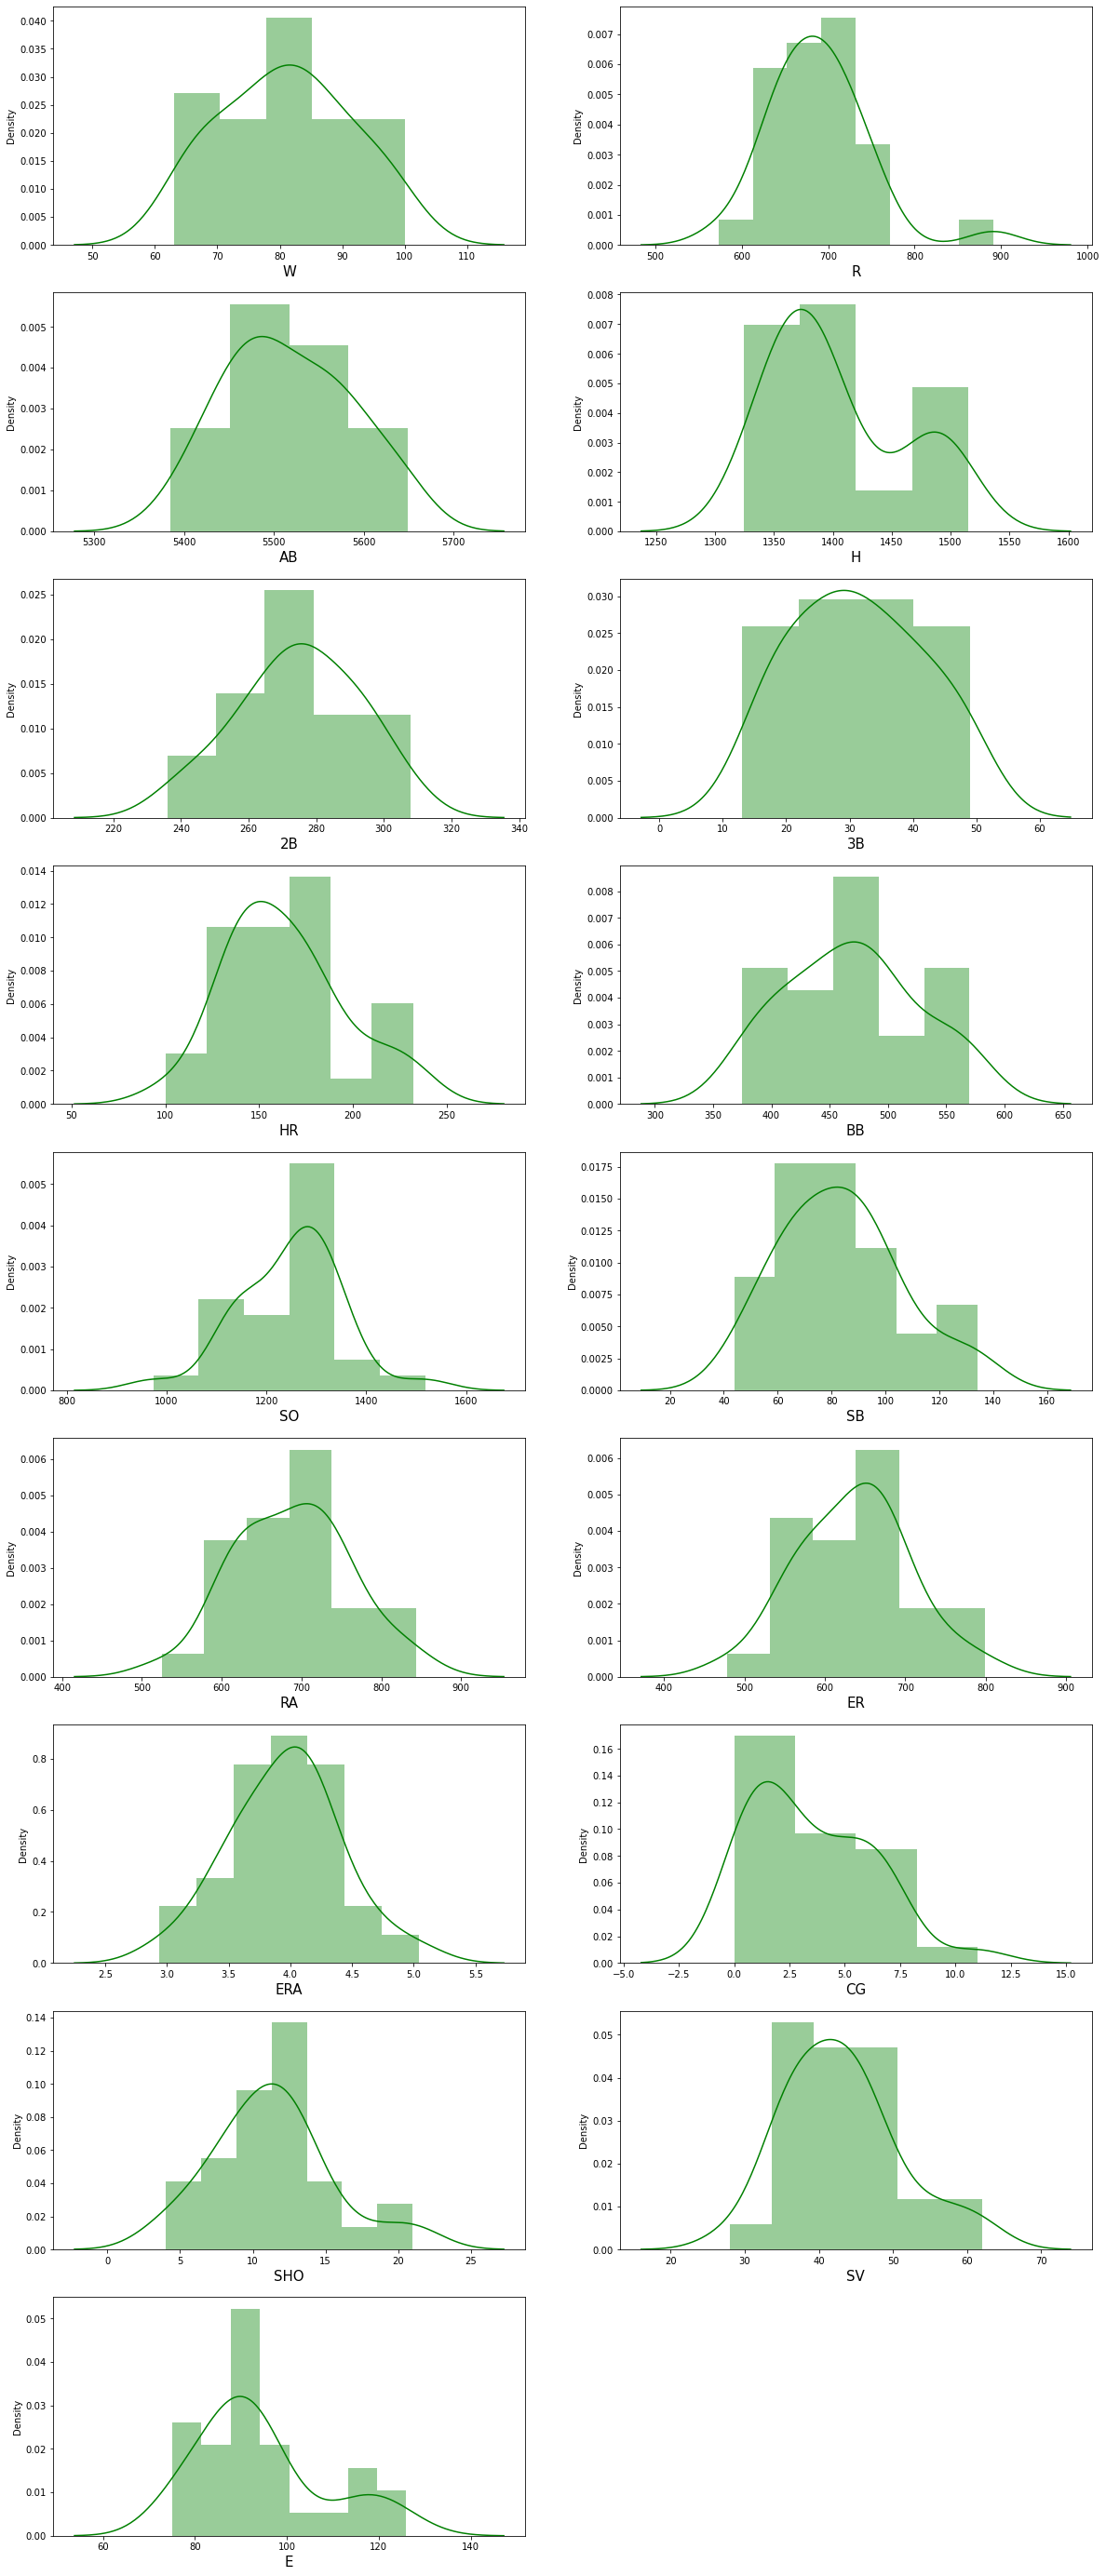

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(20,50))
sns.set_palette('bright')
graph=1

for column in df.columns:
    if graph<=len(df.columns):
        ax=plt.subplot(9,2,graph)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] W , AB, BB, SO,SB RA,SV these features have flattened curve of distribution which suggest that data is spread from mean.

2] CG SHO E,H and R have skewed distribution 

* Analysis of Outliers with Box PLOt

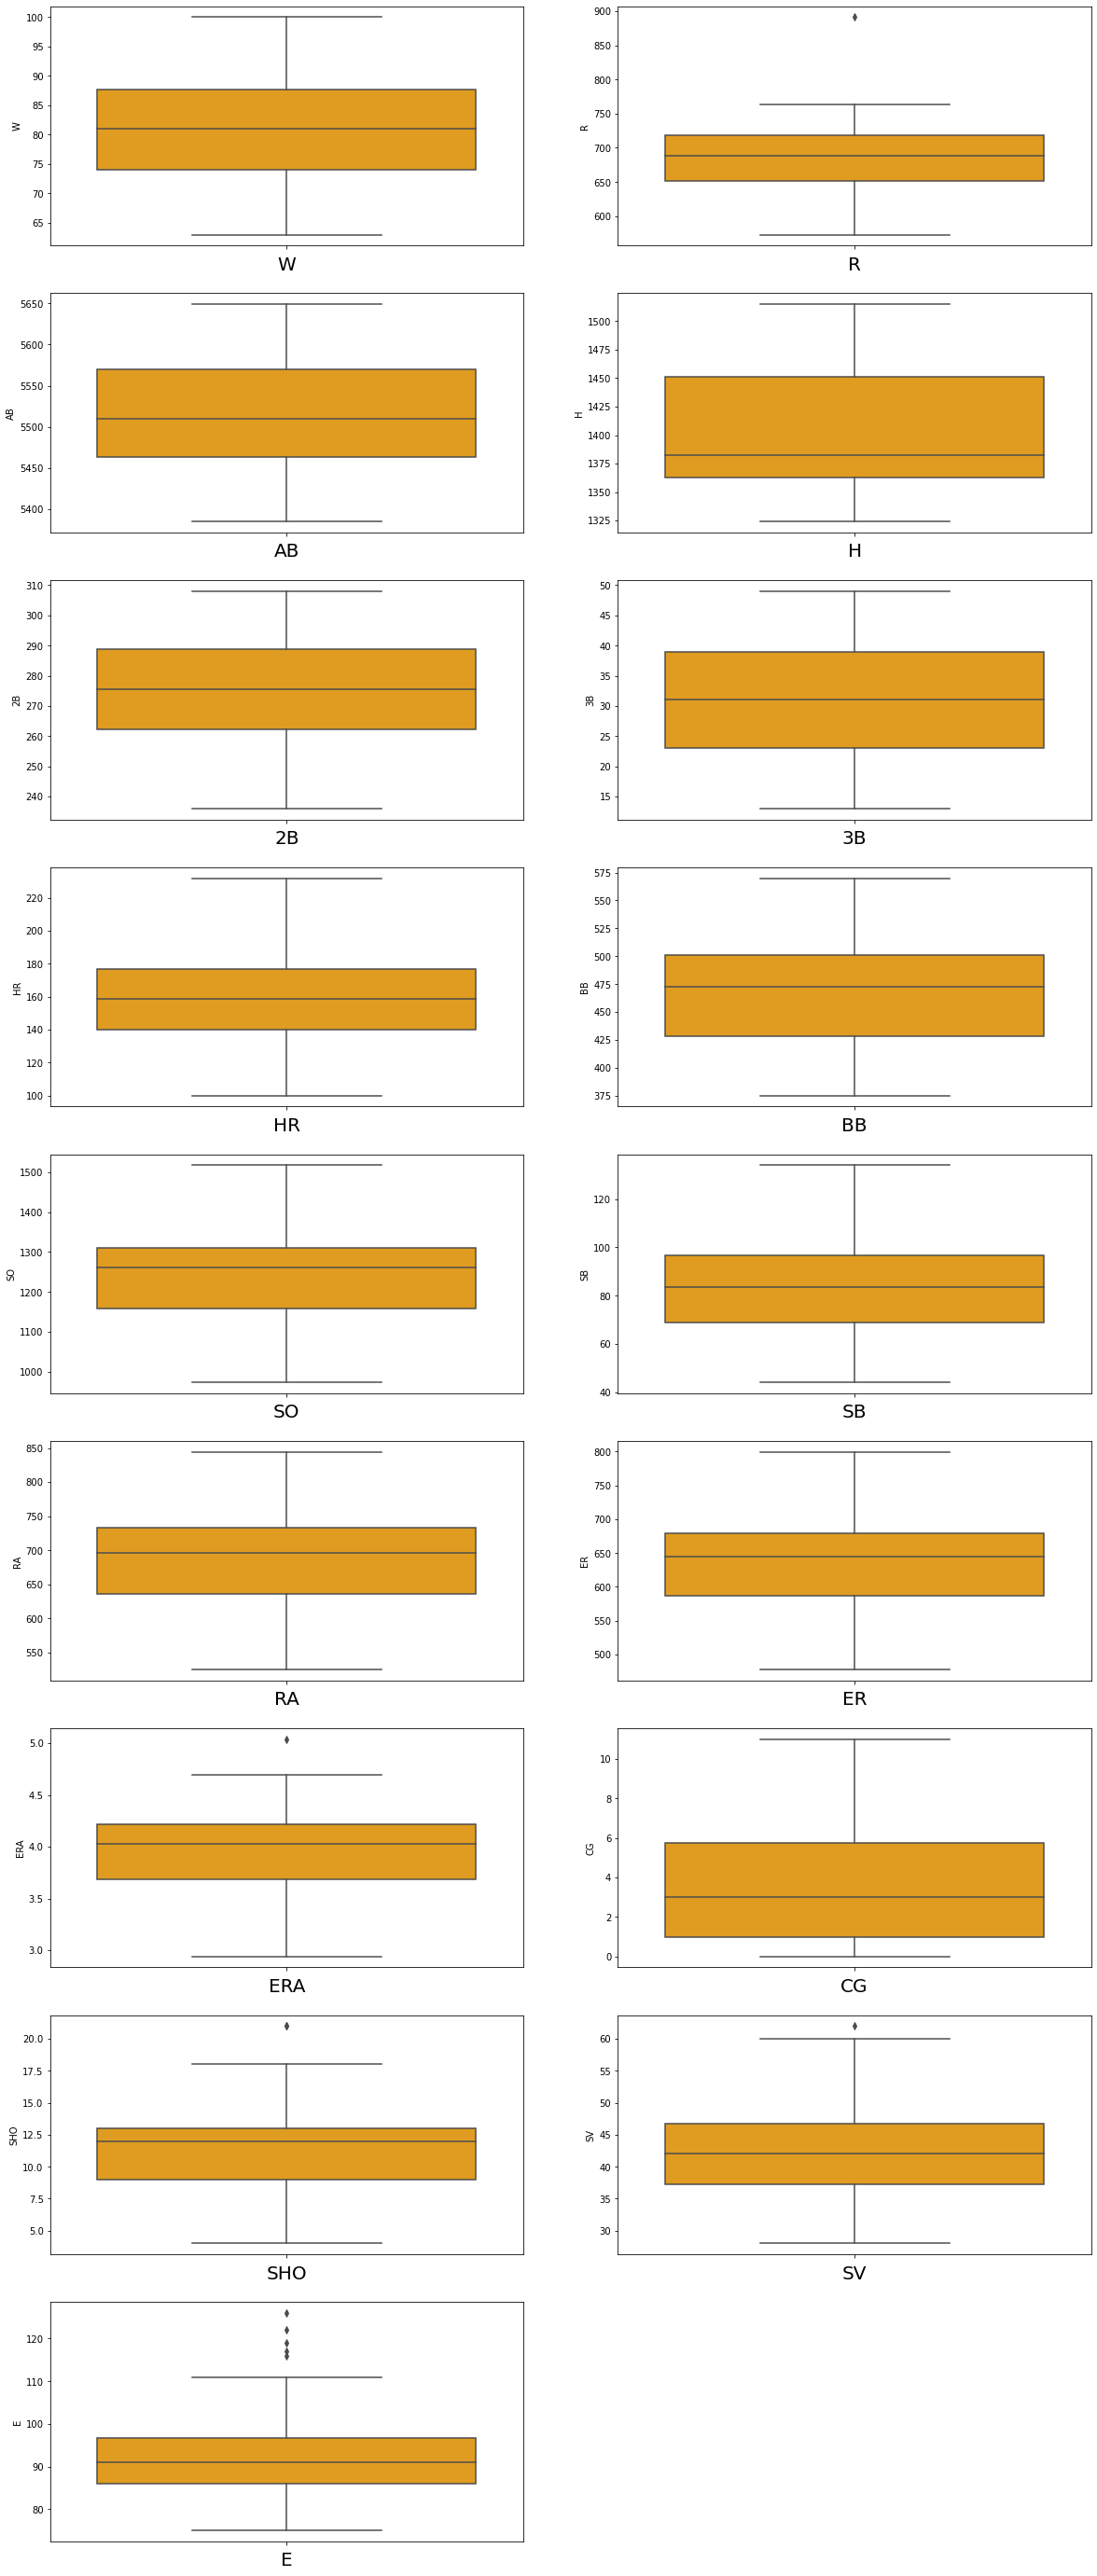

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(20,50))
sns.set_palette('bright')
graph=1

for column in df.columns:
    if graph<=len(df.columns):
        ax=plt.subplot(9,2,graph)
        sns.boxplot(y=df[column],color='orange')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

1] R has 1 outlier detected at higher side

2]  ERa has 1 outlier detected at higher side

3]  SHO has 1 outlier detected at higher side

4]  SV has 1 outlier detected at higher side

5]  E has 5 points detected as outliers

* Analysis of skewness of features.

In [13]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Text(0.5, 1.0, 'Skewness of features')

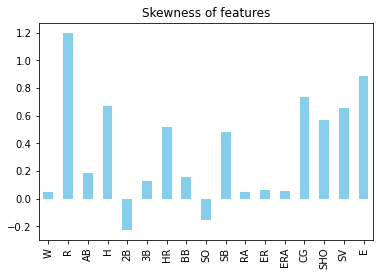

In [14]:
df.skew().plot(kind='bar',color='skyblue')
plt.title('Skewness of features')

1] R,H,HR,CG,SHO,SV,E features have high positive skewness which have to be handle.

2] 2B,SO features have low skewness but negative.


* Analysis for Outliers elimination and Data loss 

* create new dataframe with copying original for analysis


In [15]:
data=df.copy()

In [16]:
data.shape

(30, 17)

* 30 record in dataset before outlier removal

In [17]:
from scipy.stats import zscore

In [18]:
z=np.abs(zscore(data))
data=data[(z<3).all(axis=1)]
data.shape


(29, 17)

In [19]:
print("AS 29 records are in dataset after outlier removal so data loss is {} ".format((1/30)*100))

AS 29 records are in dataset after outlier removal so data loss is 3.3333333333333335 


* Perform outlier removal with zscore method in original dataset df.

In [20]:
z1=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape


(29, 17)

In [21]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


* Analysis for Features with Target W .

In [22]:
predictors=df.columns[df.columns!='W']
len(predictors)

16

* Relationship of features with Target W(win)

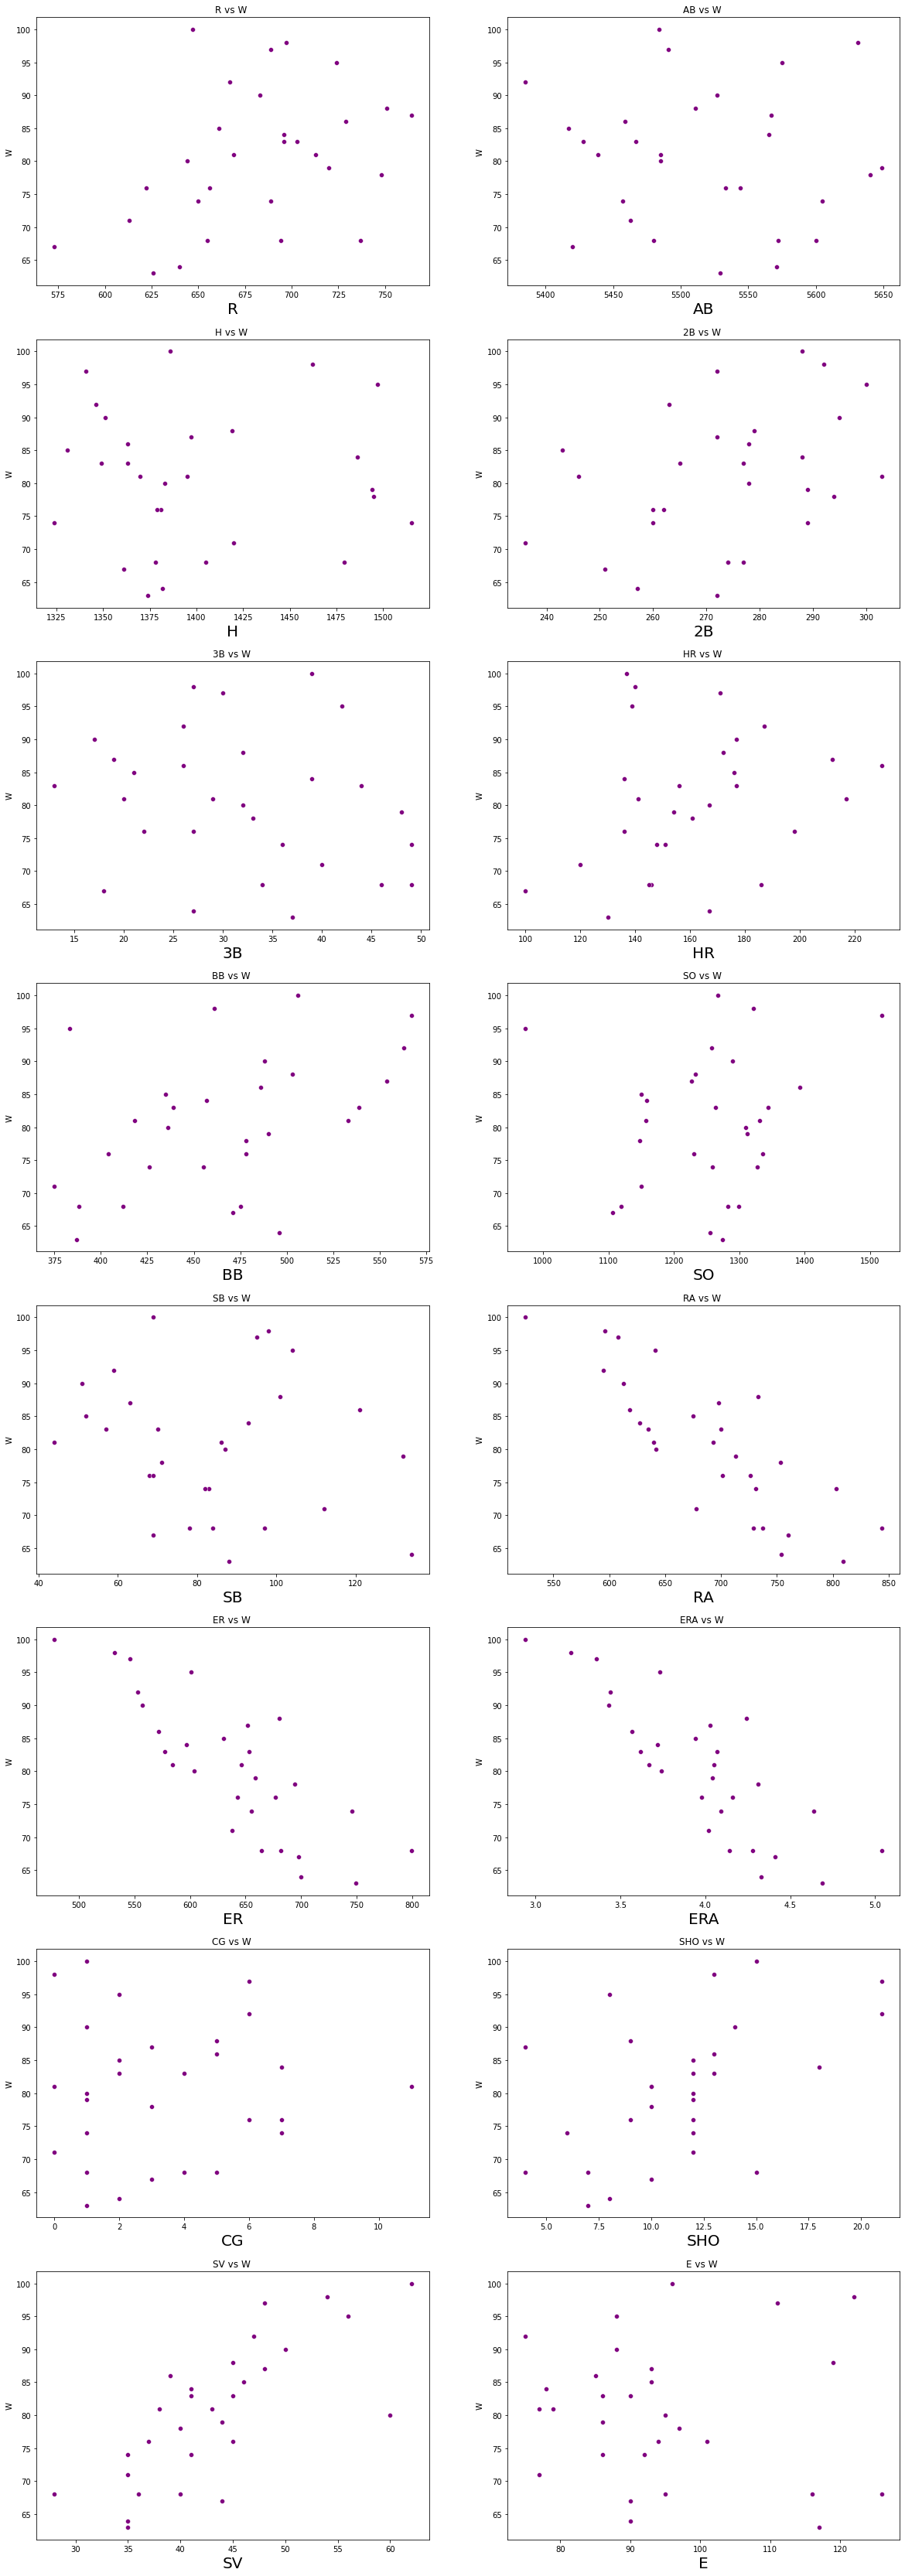

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20,60))
sns.set_palette('bright')
graph=1

for column in predictors:
    if graph<=len(predictors):
        ax=plt.subplot(8,2,graph)
        sns.scatterplot(x=df[column],y=df['W'],color='purple')
        plt.title('{} vs W '.format(column))
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

1] RA feature has negative linear relationship with target W

2] ERA feature has negative linear relationship with target W

3] ER feature has negative linear relationship with target W

4] SV feature has negative linear relationship with target W

* Analysis of correlation of features with target.

In [24]:
(df[predictors].corrwith(df['W'])).abs()

R      0.390451
AB     0.085780
H      0.018360
2B     0.384886
3B     0.206737
HR     0.245697
BB     0.447513
SO     0.156469
SB     0.169503
RA     0.823176
ER     0.815308
ERA    0.826952
CG     0.029594
SHO    0.497526
SV     0.749290
E      0.072858
dtype: float64

<AxesSubplot:>

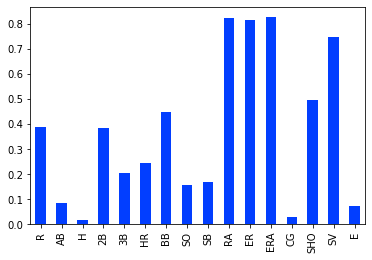

In [25]:
(df[predictors].corrwith(df['W']).abs()).plot.bar('cyan')

1] RA,ERA,ER,SHO,SV have high correlation with Target W

2] while AB,H,SO,SB<CG,E have very low correlation with Target W

3] other features have moderate correlation with target W

* Correlation Analysis of fetures with each other

In [26]:
cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


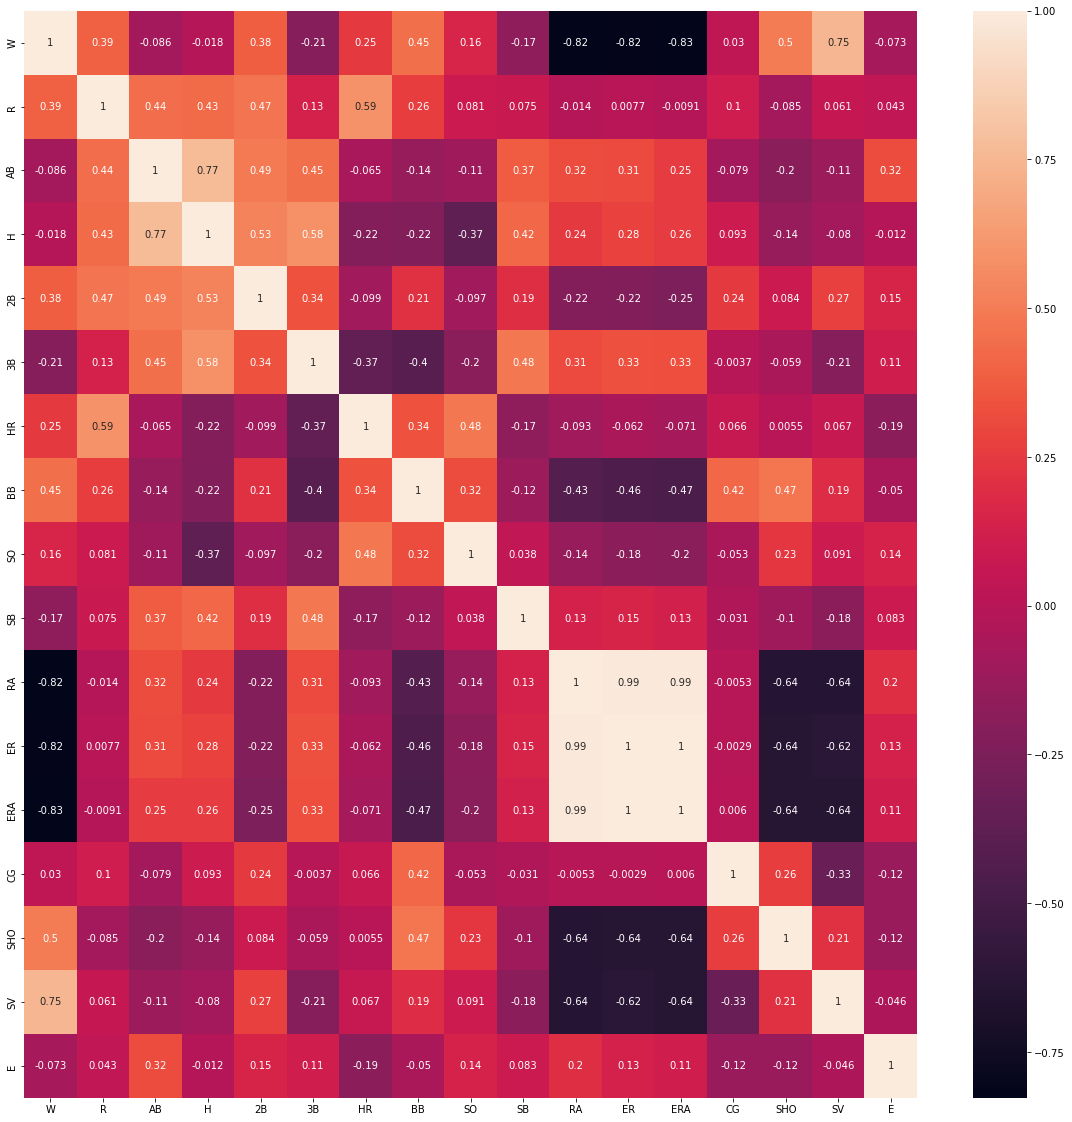

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()


1] RA has strong positive corelation of 0.99 with ERA

2] RA has strong positive corelation of 0.99 with ER

3] ERA has strong correlation of 1. with ER

4] H feature has strong correlation of 0.77 with AB feature.

5] SV has correlation of 0.75 with W target .

6] SHO and BB has moderate correlation of 0.5 and 0.45 with W target respectively.

* Analysis relationship of RA feature with ERA

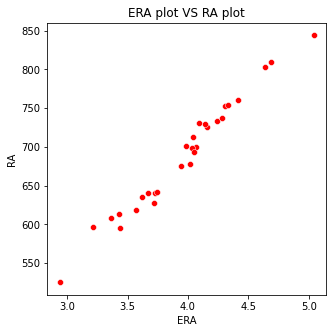

In [28]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['ERA'],y=df["RA"],color='red')
plt.title('ERA plot VS RA plot')
plt.show()

1] There is perfect linear relation can be observe from graph

* Analysis relationship of RA feature with ER

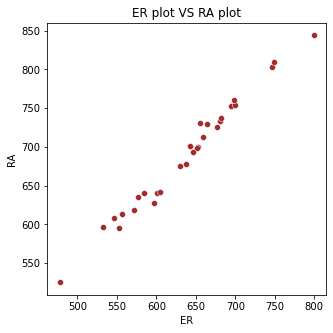

In [29]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['ER'],y=df["RA"],color='brown')
plt.title('ER plot VS RA plot')
plt.show()

1] THere is perfect linear relation can be observe from graph

* Analysis relationship of ER feature with ERA

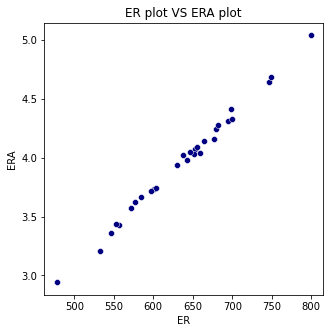

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['ER'],y=df["ERA"],color='navy')
plt.title('ER plot VS ERA plot')
plt.show()

* There is strong perfect positive linear relationship between these variable.as these statics are calculated with same formula 

* Analysis relationship of H feature with AB

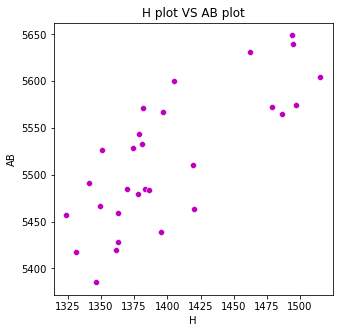

In [31]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['H'],y=df["AB"],color='m')
plt.title('H plot VS AB plot')
plt.show()

1] There is positive relationship can be observe as graph growing oin upward direction

* Analyse multicollinearity with variance inflation factor

In [32]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['W'],axis=1)
predictor1=Predictors1.to_numpy()

VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1

,Features,vif_scores
0,R,1684.071804
1,AB,4386.435411
2,H,4542.383497
3,2B,874.293076
4,3B,35.695117
5,HR,267.423009
6,BB,260.583556
7,SO,399.764153
8,SB,28.928494
9,RA,17975.314054


* Analyse vif score after eliminating ER having high vif score

In [33]:
Predictors2=df.drop(columns=['W','ER'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2

,Features,vif_scores
0,R,1524.034796
1,AB,3866.227846
2,H,3837.698035
3,2B,872.030633
4,3B,34.688953
5,HR,189.887960
6,BB,259.185350
7,SO,355.180078
8,SB,27.256806
9,RA,8368.983387


* Analyse vif score after eliminating RA having high vif score

In [34]:
Predictors3=df.drop(columns=['W','ER','RA'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3

,Features,vif_scores
0,R,1493.705688
1,AB,3861.415079
2,H,3823.864099
3,2B,844.083717
4,3B,34.685687
5,HR,186.767282
6,BB,227.927442
7,SO,314.579409
8,SB,26.391967
9,ERA,364.225388


* Analyse vif score after eliminating AB having high vif score

In [35]:
Predictors4=df.drop(columns=['W','ER','RA','AB'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4

,Features,vif_scores
0,R,1434.768717
1,H,1907.120050
2,2B,799.736000
3,3B,32.840811
4,HR,182.847916
5,BB,215.410615
6,SO,274.848539
7,SB,25.854205
8,ERA,323.137530
9,CG,5.367030


* Analyse vif score after eliminating H having high vif score

In [36]:
Predictors5=df.drop(columns=['W','ER','RA','AB','H'],axis=1)
predictor5=Predictors5.to_numpy()
VIF5=pd.DataFrame()
VIF5["Features"]=Predictors5.columns
VIF5["vif_scores"]=[variance_inflation_factor(predictor5,i) for i in range(Predictors5.shape[1])]
VIF5

,Features,vif_scores
0,R,908.326865
1,2B,674.593322
2,3B,29.529722
3,HR,142.280402
4,BB,199.341576
5,SO,272.459457
6,SB,21.088437
7,ERA,120.064001
8,CG,5.360177
9,SHO,18.625177


* Analyse vif score after eliminating R having high vif score

In [37]:
Predictors6=df.drop(columns=['W','ER','RA','AB','H','R'],axis=1)
predictor6=Predictors6.to_numpy()
VIF6=pd.DataFrame()
VIF6["Features"]=Predictors6.columns
VIF6["vif_scores"]=[variance_inflation_factor(predictor6,i) for i in range(Predictors6.shape[1])]
VIF6

,Features,vif_scores
0,2B,374.905369
1,3B,27.184583
2,HR,55.304094
3,BB,182.843964
4,SO,236.806022
5,SB,21.088285
6,ERA,110.039937
7,CG,4.962839
8,SHO,18.598794
9,SV,71.912073


* Analyse vif score after eliminating 2B having high vif score

In [38]:
Predictors7=df.drop(columns=['W','ER','RA','AB','H','R','2B'],axis=1)
predictor7=Predictors7.to_numpy()
VIF7=pd.DataFrame()
VIF7["Features"]=Predictors7.columns
VIF7["vif_scores"]=[variance_inflation_factor(predictor7,i) for i in range(Predictors7.shape[1])]
VIF7

,Features,vif_scores
0,3B,21.960591
1,HR,55.249347
2,BB,158.243288
3,SO,236.451920
4,SB,20.828536
5,ERA,98.187269
6,CG,4.432063
7,SHO,18.500169
8,SV,43.778661
9,E,55.559263


* Analyse vif score after eliminating SO having high vif score

In [39]:
Predictors8=df.drop(columns=['W','ER','RA','AB','H','R','2B','SO'],axis=1)
predictor8=Predictors8.to_numpy()
VIF8=pd.DataFrame()
VIF8["Features"]=Predictors8.columns
VIF8["vif_scores"]=[variance_inflation_factor(predictor8,i) for i in range(Predictors8.shape[1])]
VIF8

,Features,vif_scores
0,3B,21.824678
1,HR,41.102883
2,BB,153.283518
3,SB,19.748846
4,ERA,82.873400
5,CG,4.288634
6,SHO,15.813240
7,SV,42.474459
8,E,49.202028


* Analyse vif score after eliminating BB having high vif score

In [40]:
Predictors9=df.drop(columns=['W','ER','RA','AB','H','R','2B','SO','BB'],axis=1)
predictor9=Predictors9.to_numpy()
VIF9=pd.DataFrame()
VIF9["Features"]=Predictors9.columns
VIF9["vif_scores"]=[variance_inflation_factor(predictor9,i) for i in range(Predictors9.shape[1])]
VIF9

,Features,vif_scores
0,3B,18.713962
1,HR,36.213323
2,SB,18.266271
3,ERA,73.217506
4,CG,3.296943
5,SHO,11.835004
6,SV,32.529088
7,E,45.990507


* Analyse vif score after eliminating ERA having high vif score 

In [41]:
Predictors10=df.drop(columns=['W','ER','RA','AB','H','R','2B','SO','BB','ERA'],axis=1)
predictor10=Predictors10.to_numpy()
VIF10=pd.DataFrame()
VIF10["Features"]=Predictors10.columns
VIF10["vif_scores"]=[variance_inflation_factor(predictor10,i) for i in range(Predictors10.shape[1])]
VIF10

,Features,vif_scores
0,3B,14.561719
1,HR,24.840427
2,SB,18.191965
3,CG,3.165595
4,SHO,10.401740
5,SV,32.521545
6,E,32.203523


* Analyse vif score after eliminating SV having high vif score

In [42]:
Predictors11=df.drop(columns=['W','ER','RA','AB','H','R','2B','SO','BB','ERA','SV'],axis=1)
predictor11=Predictors11.to_numpy()
VIF11=pd.DataFrame()
VIF11["Features"]=Predictors11.columns
VIF11["vif_scores"]=[variance_inflation_factor(predictor11,i) for i in range(Predictors11.shape[1])]
VIF11

,Features,vif_scores
0,3B,14.531372
1,HR,19.488438
2,SB,18.178866
3,CG,2.776809
4,SHO,8.449340
5,E,27.291445


* Its not possible to remove collinearity from dataset by eleiminating any column as can be observe from above analysis

1] to handle this scenario in feature correlation , it is required to apply PCA aproach.

* Analysis of skewness in of features.

In [43]:
predictors

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [44]:
len(predictors)

16

In [45]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [46]:
len(df.columns)

17

* Analysis of skewness in of features.

In [47]:
df[predictors].skew().abs()

R      0.215364
AB     0.169573
H      0.783772
2B     0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO     0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

<AxesSubplot:>

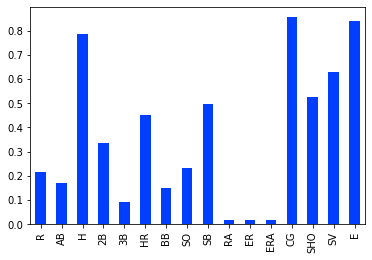

In [48]:
(df[predictors].skew().abs().abs()).plot.bar()

1] High degree of skewness observe in H,CG,SHO,SV,E

2] Moderate skewness observe HR,SB,2B

3] very low skewness observed in RA,ER,ERA

* Analysis of skewness with transformation

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
transform1=pd.DataFrame()
pwr1=PowerTransformer(method='yeo-johnson')
transform1[predictors]=pwr1.fit_transform(df[predictors])
transform1[predictors].skew()

R     -0.024842
AB     0.081092
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

<AxesSubplot:>

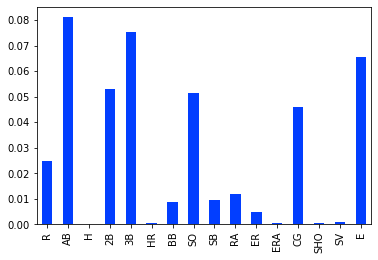

In [51]:
(transform1[predictors].skew().abs()).plot.bar()

* Square root transformation

In [52]:
transform2=pd.DataFrame()
transform2=np.sqrt(df[predictors])
transform2.skew().abs()


R      0.300697
AB     0.158871
H      0.761274
2B     0.401549
3B     0.197276
HR     0.186909
BB     0.044339
SO     0.432255
SB     0.184522
RA     0.119506
ER     0.146201
ERA    0.165586
CG     0.260678
SHO    0.085802
SV     0.370280
E      0.714966
dtype: float64

<AxesSubplot:>

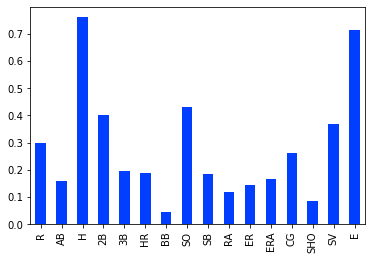

In [53]:
(transform2.skew().abs()).plot.bar()

* Cube Root Transformation

In [54]:
transform3=pd.DataFrame()
transform3=np.cbrt(df[predictors])
transform3.skew().abs()

R      0.329729
AB     0.155301
H      0.753696
2B     0.423788
3B     0.300967
HR     0.093886
BB     0.008882
SO     0.498255
SB     0.079220
RA     0.166248
ER     0.201289
ERA    0.226238
CG     1.013981
SHO    0.298136
SV     0.280963
E      0.671748
dtype: float64

<AxesSubplot:>

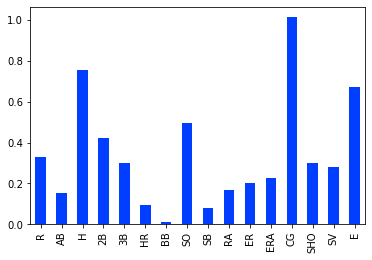

In [55]:
(transform3.skew().abs()).plot.bar()

* LOg Transformation

In [56]:
transform4=pd.DataFrame()
transform4=np.log(df[predictors])
transform4.skew().abs()

R      0.388698
AB     0.148157
H      0.738423
2B     0.468491
3B     0.521051
HR     0.100335
BB     0.061686
SO     0.630142
SB     0.133398
RA     0.261173
ER     0.311877
ERA    0.347433
CG          NaN
SHO    0.726124
SV     0.096752
E      0.583308
dtype: float64

<AxesSubplot:>

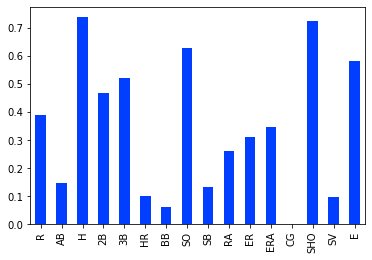

In [57]:
(transform4.skew().abs()).plot.bar()

* OUt of all above transformation Powertransformer works betterr. transform original dataframe with powertransformer

* PowerTransformation with yeojohnson method on original dataframe

In [58]:
pwr1=PowerTransformer(method='yeo-johnson')
df[predictors]=pwr1.fit_transform(df[predictors])

* Analysing Skewness After Transformation

In [59]:
df[predictors].skew().abs()

R      0.024842
AB     0.081092
H      0.000000
2B     0.052793
3B     0.075139
HR     0.000448
BB     0.008572
SO     0.051530
SB     0.009570
RA     0.011974
ER     0.004988
ERA    0.000401
CG     0.045947
SHO    0.000529
SV     0.000925
E      0.065585
dtype: float64

<AxesSubplot:>

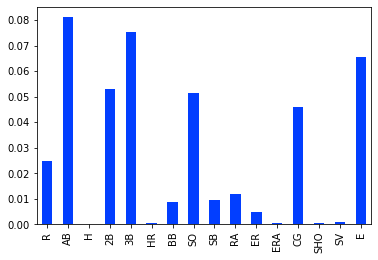

In [60]:
(df[predictors].skew().abs()).plot.bar()

1] Skewness of all features has been reduced below 0.1

* Analyse distribution of features before and after transformation and outlier removal

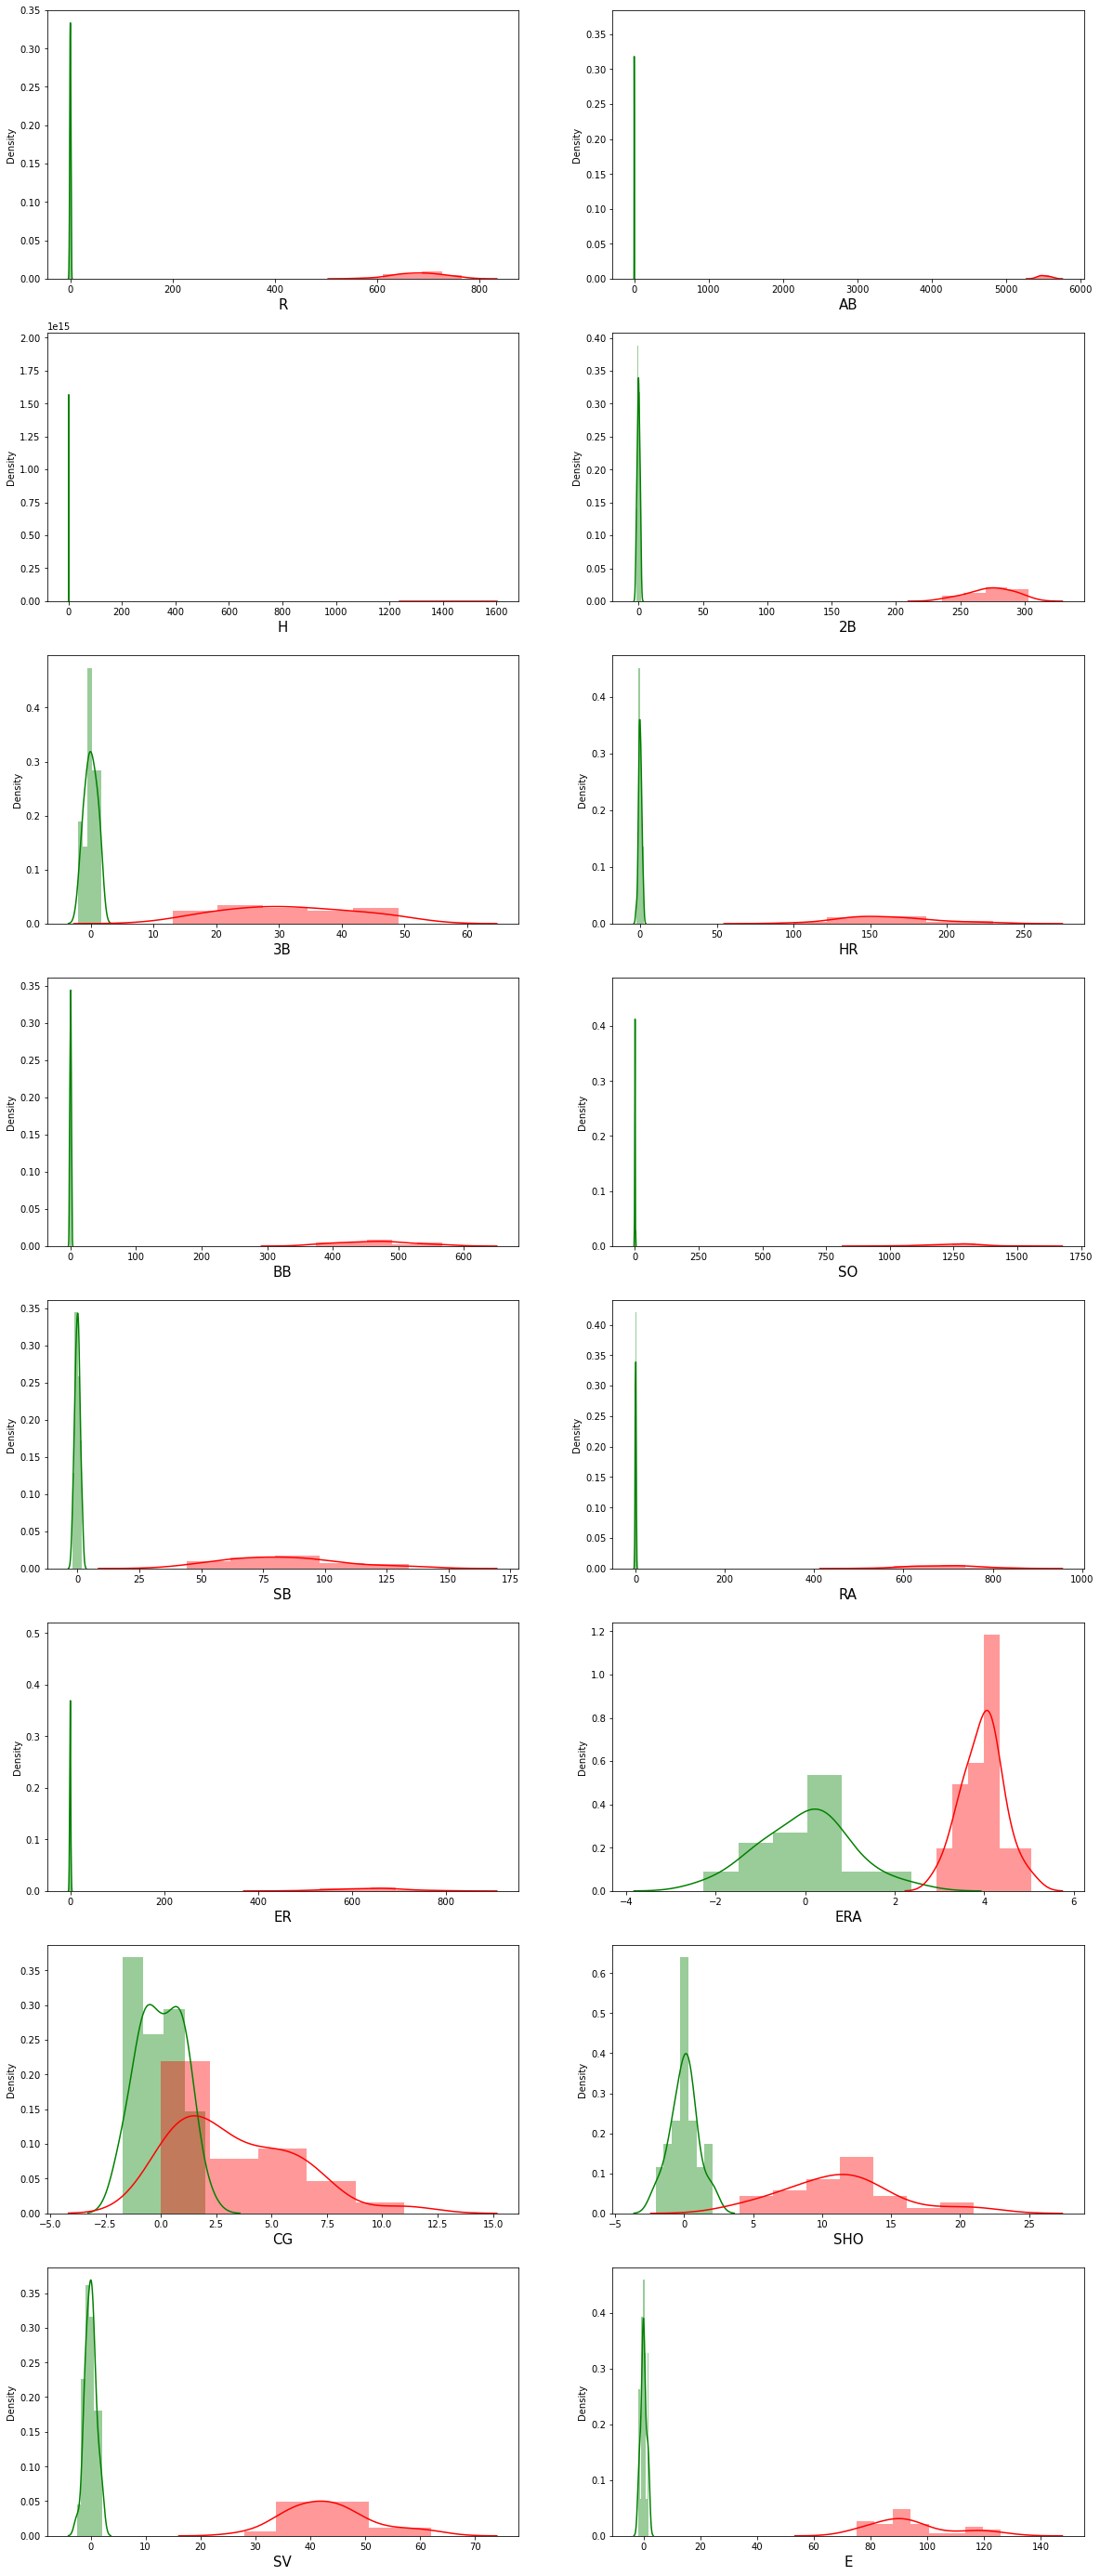

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(20,50))
sns.set_palette('bright')
graph=1

for column in predictors:
    if graph<=len(predictors):
        ax=plt.subplot(8,2,graph)
        sns.distplot(df[column],color='green') #after
        sns.distplot(data[column],color='red') # before
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Green graph is distribution of feature after transformation

1] Red graph is distribution of feature before transformation

* Split data into Features and Label

In [62]:
x1=df.drop(columns=['W'],axis=1)
y1=df.W

In [63]:
x1.shape

(29, 16)

In [64]:
y1.shape

(29,)

* Standardization of features

In [65]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scaled=st.fit_transform(x1)

In [66]:
x_scaled.shape

(29, 16)

* Features have low correlation with label and there is multicollinearity exist within features which cannot be removed with 
elimination of features having some amount of correlation with label  among other features.

* This scenario can be handle with PCA.

In [67]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[ 1.06077323e+00, -2.98770064e+00,  2.19712207e+00,
        -7.09411227e-01, -2.27798260e+00, -2.27006009e-01,
        -9.53597268e-01, -4.55422795e-01,  6.26624565e-01,
        -4.06575501e-01,  6.53409735e-01, -1.93607820e-01,
        -2.62581534e-01,  2.23590664e-01, -6.52136482e-02,
        -1.40474360e-02],
       [-1.78459133e-03,  4.85108640e-01,  3.01964309e-01,
        -4.87626877e-02, -2.60721545e-01,  6.36806295e-01,
         1.86393563e-01, -1.53428476e+00, -1.65251925e-01,
        -1.55210111e-01, -7.42688329e-01, -1.60119196e-01,
        -1.34673866e-01,  5.02225953e-01,  4.45830145e-02,
         3.50905967e-02],
       [-1.14204675e+00, -9.75735995e-01,  2.75031426e-01,
         2.78159989e+00, -7.36793194e-01, -6.55757547e-01,
        -1.63959679e+00, -3.28321560e-01, -1.47946062e-03,
         1.28860985e+00, -2.96329580e-01,  8.94155881e-02,
         2.89773420e-02, -2.25889163e-01, -2.47201681e-02,
         5.42267979e-03],
       [ 7.45633455e-01,  1.41324016e

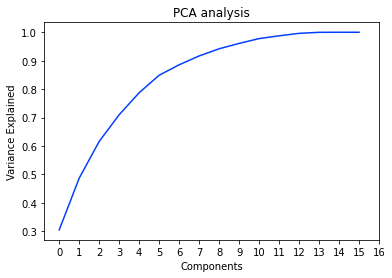

In [68]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,17))
plt.show()

In [69]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))  

0     0.304774
1     0.486535
2     0.615902
3     0.709759
4     0.787177
5     0.848787
6     0.885453
7     0.916612
8     0.941789
9     0.960700
10    0.977684
11    0.987436
12    0.996087
13    0.999737
14    0.999984
15    1.000000
dtype: float64

*  From above analysis,11 components of PCA are explaining 97.77 of data variance let use only 11 components.

In [70]:
pca1=PCA(n_components=11)
dim=pca1.fit_transform(x_scaled)
x_dim=pd.DataFrame(dim,columns=[('PC{}').format(i) for i in range(1,12)])
x_dim

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.060773,-2.987701,2.197122,-0.709411,-2.277983,-0.227006,-0.953597,-0.455423,0.626625,-0.406576,0.653410
1,-0.001785,0.485109,0.301964,-0.048763,-0.260722,0.636806,0.186394,-1.534285,-0.165252,-0.155210,-0.742688
2,-1.142047,-0.975736,0.275031,2.781600,-0.736793,-0.655758,-1.639597,-0.328322,-0.001479,1.288610,-0.296330
3,0.745633,1.413240,0.723565,0.702081,0.431209,-1.097404,0.342927,-0.013289,0.441846,0.515935,1.417617
4,3.329728,-1.336964,-0.622597,1.702978,0.050742,0.362315,0.927049,-0.453922,-1.240091,0.202353,0.103331
5,-0.183889,-0.310763,-2.982714,-1.170081,-1.734703,-0.993414,-0.874806,0.818416,0.156884,-0.249493,-0.491349
6,-0.912019,2.251044,-1.371722,-1.639617,-2.018458,1.538950,1.425938,0.175259,-0.035859,0.369702,-0.039903
7,-1.341489,-0.027732,1.009571,-1.492680,0.291598,0.323650,-0.438831,-0.586240,-0.740709,-0.405401,0.547247
8,2.129373,-2.051901,-1.048987,0.026739,-1.185168,-1.023238,0.840539,0.413927,-0.179549,-0.001800,-0.348756
9,1.089459,-1.018154,-1.608554,-0.208223,0.419355,-0.937163,-0.924306,-0.209289,0.482676,-1.202830,-0.172279


In [71]:
x_dim.shape

(29, 11)

In [72]:
y1.shape

(29,)

In [73]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 
from sklearn.model_selection import cross_val_score

In [74]:
maxR2=0
maxRn=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_dim,y1,test_size=0.25,random_state=i)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    r2=regr.score(x_test,y_test)
    print("R squared ",r2,'Random sate ',i)
    
    if r2>maxR2:
        maxR2=r2
        maxRn=i
        print("R-squared",maxR2,"random_state",i)
        

R squared  0.9367856304345125 Random sate  1
R-squared 0.9367856304345125 random_state 1
R squared  -0.44645592484462715 Random sate  2
R squared  0.5296840859987851 Random sate  3
R squared  0.8251550855375722 Random sate  4
R squared  0.49133787633490555 Random sate  5
R squared  0.6664160887191657 Random sate  6
R squared  0.8072884905984524 Random sate  7
R squared  0.71480923275946 Random sate  8
R squared  0.6799187863744555 Random sate  9
R squared  0.3396123813229881 Random sate  10
R squared  0.4551526621275669 Random sate  11
R squared  0.6686679006942107 Random sate  12
R squared  0.6214507849175754 Random sate  13
R squared  0.6618454712409716 Random sate  14
R squared  0.7663850411474413 Random sate  15
R squared  0.08003562135768039 Random sate  16
R squared  0.7855473231714878 Random sate  17
R squared  -0.020546827645142818 Random sate  18
R squared  0.5403795653089825 Random sate  19
R squared  -0.01766757135395247 Random sate  20
R squared  0.6381070890500792 Random s

In [75]:
print("Maximum R squared obtained  is ",maxR2,'at random state',maxRn) 

Maximum R squared obtained  is  0.9418061392315421 at random state 44


* Train Test data split .

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_dim,y1,test_size=0.25,random_state=44)

* score Function

In [77]:
def Reg_eval(regr,x_train,y_train,x_test,y_test,train=True):
    if train==True:
        print('********** Training Evaluation *******************')
        ytrain_pred=regr.predict(x_train)
        
        R2_train=r2_score(y_train,ytrain_pred)
       
        RMSE_train=np.sqrt(mean_squared_error(y_train,ytrain_pred))
        print("\nThe R squared for {0}  for Train data  is {1} ".format(str(regr),R2_train))
        print("\nThe Root mean squared error for {0}  for Train data is {1} ".format(str(regr),RMSE_train))
        
        
        
    elif train==False:
        print('\n********** Testing  Evaluation *******************')
        ytest_pred=regr.predict(x_test)
        R2_test=r2_score(y_test,ytest_pred)
        RMSE_test=np.sqrt(mean_squared_error(y_test,ytest_pred))
        print(" \nThe R squared for {0}  for Test data is {1} ".format(str(regr),R2_test))
        print("\nThe Root mean squared error for {0}  Test data  is {1} ".format(str(regr),RMSE_test))

def Reg_plot(regr,x_test,y_test):
    y_pred_test=regr.predict(x_test)
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=y_test,y=y_pred_test)
    plt.plot(y_test,y_test,color='red')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted sales")
    plt.title("{} Prediction VS Actual data".format(type(regr)))
    plt.show()

* Linear Regression

In [78]:
LinR1=LinearRegression()
LinR1.fit(x_train,y_train)

Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for LinearRegression()  for Train data  is 0.8834340368518155 

The Root mean squared error for LinearRegression()  for Train data is 3.357577927995493 

********** Testing  Evaluation *******************
 
The R squared for LinearRegression()  for Test data is 0.9418061392315421 

The Root mean squared error for LinearRegression()  Test data  is 2.6806776243759796 


* Lasso Regression

In [79]:
las1=Lasso(alpha=0.1)
las1.fit(x_train,y_train)

Reg_eval(las1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(las1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Lasso(alpha=0.1)  for Train data  is 0.8817707824214982 

The Root mean squared error for Lasso(alpha=0.1)  for Train data is 3.3814473580406035 

********** Testing  Evaluation *******************
 
The R squared for Lasso(alpha=0.1)  for Test data is 0.9169150441791759 

The Root mean squared error for Lasso(alpha=0.1)  Test data  is 3.2030756846251824 


* Ridge Regression

In [80]:
rid1=Ridge(alpha=0.1)
rid1.fit(x_train,y_train)

Reg_eval(rid1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rid1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Ridge(alpha=0.1)  for Train data  is 0.883417312589239 

The Root mean squared error for Ridge(alpha=0.1)  for Train data is 3.3578187830417843 

********** Testing  Evaluation *******************
 
The R squared for Ridge(alpha=0.1)  for Test data is 0.9406739139379201 

The Root mean squared error for Ridge(alpha=0.1)  Test data  is 2.7066297601578504 


* SVRegressor

In [81]:
SVR1=SVR(gamma=0.1,C=10,kernel='poly')
SVR1.fit(x_train,y_train)

Reg_eval(SVR1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(SVR1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for SVR(C=10, gamma=0.1, kernel='poly')  for Train data  is 0.9702726221759103 

The Root mean squared error for SVR(C=10, gamma=0.1, kernel='poly')  for Train data is 1.6955809338971495 

********** Testing  Evaluation *******************
 
The R squared for SVR(C=10, gamma=0.1, kernel='poly')  for Test data is 0.8665893164081816 

The Root mean squared error for SVR(C=10, gamma=0.1, kernel='poly')  Test data  is 4.058834177649839 


* RandomForestRegressor

In [82]:
rf1=RandomForestRegressor(criterion='absolute_error',min_samples_split=4,n_estimators=100,max_depth=3,min_samples_leaf=1,random_state=9)
rf1.fit(x_train,y_train)

Reg_eval(rf1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rf1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_split=4, random_state=9)  for Train data  is 0.8908167409144198 

The Root mean squared error for RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_split=4, random_state=9)  for Train data is 3.2495127839929063 

********** Testing  Evaluation *******************
 
The R squared for RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_split=4, random_state=9)  for Test data is 0.4567340503606223 

The Root mean squared error for RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_split=4, random_state=9)  Test data  is 8.190534552152261 


* XGRegressor

In [83]:
xgr1=XGBRegressor(learning_rate=1,n_estimators=100,eta=1.0,booster='gblinear')
xgr1.fit(x_train,y_train)

Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=1.0, eval_metric=None, gamma=None,
             gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, ...)  for Train data  is 0.8834340279552144 

The Root mean squared error for XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsam

* DecisionTree regressor

In [84]:
dt1=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3,min_samples_split=2, min_samples_leaf=1,random_state=5)
dt1.fit(x_train,y_train)

Reg_eval(dt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(dt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=5)  for Train data  is 0.9129513481828839 

The Root mean squared error for DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=5)  for Train data is 2.9014911327885864 

********** Testing  Evaluation *******************
 
The R squared for DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=5)  for Test data is 0.5560001827716621 

The Root mean squared error for DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=5)  Test data  is 7.404528339506545 


* GradientBoostingRegressor

In [85]:
gbdt1=GradientBoostingRegressor(loss='absolute_error',learning_rate=1,criterion='friedman_mse',n_estimators=100,random_state=5,min_samples_split=2,min_samples_leaf=1)
gbdt1.fit(x_train,y_train)

Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for GradientBoostingRegressor(learning_rate=1, loss='absolute_error',
                          random_state=5)  for Train data  is 0.9611019929660023 

The Root mean squared error for GradientBoostingRegressor(learning_rate=1, loss='absolute_error',
                          random_state=5)  for Train data is 1.9395630337539334 

********** Testing  Evaluation *******************
 
The R squared for GradientBoostingRegressor(learning_rate=1, loss='absolute_error',
                          random_state=5)  for Test data is 0.4837403517651525 

The Root mean squared error for GradientBoostingRegressor(learning_rate=1, loss='absolute_error',
                          random_state=5)  Test data  is 7.984359711335656 


* Table for evaluation of estimators

In [86]:
regressors=[LinR1,SVR1,las1,rid1,gbdt1,xgr1,rf1,dt1]
Names=['Linear Regressor','SVRegressor','Lasso Regressor','Ridge Regressor','GBDTRegressor',
       'XGBRegressor',"RandomForestRegressor","DecisionTreeRegressor"]

In [87]:
scores_train= []
scores_test=[]
rmse_scores=[]
for reg in regressors:
    ypred_train=reg.predict(x_train)
    ypred_test=reg.predict(x_test)
    trainsc = r2_score(y_train,ypred_train)
    testsc=r2_score(y_test,ypred_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred_test))
    
    scores_train.append(trainsc)
    scores_test.append(testsc)
    rmse_scores.append(rmse)

* selecting best cv parameter for cross validation

In [88]:
for i in [3,5,7,8,10]:
    cv=cross_val_score(LinearRegression(),x_dim,y1,cv=i,scoring='r2')
    print("R2 square is {0} for cv={1}".format(cv.mean(),i))

R2 square is 0.45641840438230163 for cv=3
R2 square is 0.2779780908656817 for cv=5
R2 square is 0.05243751514441256 for cv=7
R2 square is 0.37281505656282365 for cv=8
R2 square is -4.017897105946232 for cv=10


* Generalized score obtained for cv=5

In [89]:
from sklearn.model_selection import cross_val_score
cv_scores_mean=[]
cv_scores=[]
for reg in regressors:
    scr=cross_val_score(reg,x_dim,y1,cv=5,scoring="r2")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.2779780908656817,
 0.10137491899092273,
 0.3501284297453743,
 0.28665684812412656,
 -2.2573943812570207,
 0.277977967607188,
 -0.20547602646490798,
 -1.3338653630710033]

* Table for analysis of evaluation of algorithms

In [90]:
EvalDF=pd.DataFrame({'Regressor':Names,'Train R2 square':scores_train,'Test R2 square':scores_test,
                      'RMSE':rmse_scores,'Validation score':cv_scores_mean})
EvalDF

,Regressor,Train R2 square,Test R2 square,RMSE,Validation score
0,Linear Regressor,0.883434,0.941806,2.680678,0.277978
1,SVRegressor,0.970273,0.866589,4.058834,0.101375
2,Lasso Regressor,0.881771,0.916915,3.203076,0.350128
3,Ridge Regressor,0.883417,0.940674,2.706630,0.286657
4,GBDTRegressor,0.961102,0.483740,7.984360,-2.257394
5,XGBRegressor,0.883434,0.941806,2.680678,0.277978
6,RandomForestRegressor,0.890817,0.456734,8.190535,-0.205476
7,DecisionTreeRegressor,0.912951,0.556000,7.404528,-1.333865


In [91]:
EvalDF["criteria of selecting best model"]=EvalDF['Test R2 square']-EvalDF['Validation score']

* Sorting Values according least difference between Test and Validation score

In [92]:
EvalDF.sort_values(by="criteria of selecting best model",ascending=True)

,Regressor,Train R2 square,Test R2 square,RMSE,Validation score,criteria of selecting best model
2,Lasso Regressor,0.881771,0.916915,3.203076,0.350128,0.566787
3,Ridge Regressor,0.883417,0.940674,2.706630,0.286657,0.654017
6,RandomForestRegressor,0.890817,0.456734,8.190535,-0.205476,0.662210
0,Linear Regressor,0.883434,0.941806,2.680678,0.277978,0.663828
5,XGBRegressor,0.883434,0.941806,2.680678,0.277978,0.663828
1,SVRegressor,0.970273,0.866589,4.058834,0.101375,0.765214
7,DecisionTreeRegressor,0.912951,0.556000,7.404528,-1.333865,1.889866
4,GBDTRegressor,0.961102,0.483740,7.984360,-2.257394,2.741135


1] Lasso and Ridge regression have least devition between Test and validation score
 so we will perform hyperparameter tunning on Lasso and Ridge Rregression
 
2] The test and Train score also have very less difference. 

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
par1={'alpha':[1,0.01,0.001,0.1],
       'max_iter':range(1000,1500,50),
        'selection':['cyclic','random'],
        'tol':[0.0007,0.001,0.005,0.1]}
grid1=GridSearchCV(Lasso(),param_grid=par1,cv=5)
grid1.fit(x_train,y_train)
print(grid1.best_params_)

{'alpha': 1, 'max_iter': 1000, 'selection': 'cyclic', 'tol': 0.1}


In [95]:
las2=grid1.best_estimator_
las2.fit(x_train,y_train)

Reg_eval(las2,x_train,y_train,x_test,y_test,train=True)
Reg_eval(las2,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Lasso(alpha=1, tol=0.1)  for Train data  is 0.8245078733930217 

The Root mean squared error for Lasso(alpha=1, tol=0.1)  for Train data is 4.119732725789954 

********** Testing  Evaluation *******************
 
The R squared for Lasso(alpha=1, tol=0.1)  for Test data is 0.8405042799110948 

The Root mean squared error for Lasso(alpha=1, tol=0.1)  Test data  is 4.437930746457566 


* R2 score obtained in Hyperparametr tuning is less than obtained with default parameter of Lasso()

* Hyperparameter with Ridge Regression

In [96]:
par2={'alpha':[1,0.01,0.001,0.1],
       'max_iter':[500,1000,1500],
      'solver':['auto','svd','cholesky','lsqr','sparse_cg'],
        'tol':[0.5,0.1,0.01,0.001,0.0001]}
grid2=GridSearchCV(Ridge(),param_grid=par2,cv=5)
grid2.fit(x_train,y_train)
print(grid2.best_params_)

{'alpha': 1, 'max_iter': 500, 'solver': 'sparse_cg', 'tol': 0.1}


In [97]:
rdg2=grid2.best_estimator_
rdg2.fit(x_train,y_train)

Reg_eval(rdg2,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rdg2,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Ridge(alpha=1, max_iter=500, solver='sparse_cg', tol=0.1)  for Train data  is 0.8602312349574455 

The Root mean squared error for Ridge(alpha=1, max_iter=500, solver='sparse_cg', tol=0.1)  for Train data is 3.6765907224333976 

********** Testing  Evaluation *******************
 
The R squared for Ridge(alpha=1, max_iter=500, solver='sparse_cg', tol=0.1)  for Test data is 0.8420433341028386 

The Root mean squared error for Ridge(alpha=1, max_iter=500, solver='sparse_cg', tol=0.1)  Test data  is 4.416466932446658 


* R2 score obtained in Hyperparametr tuning is less than obtained with default parameter of Ridge(alpha=0.1).

1] I will finalize algorithms as Lasso with alpha=0.1

2] The Least deviation in validation score and Test score 

3] THe least deviation in Test score and Train score

In [98]:
las1=Lasso(alpha=0.1)
las1.fit(x_train,y_train)

Reg_eval(las1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(las1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Lasso(alpha=0.1)  for Train data  is 0.8817707824214982 

The Root mean squared error for Lasso(alpha=0.1)  for Train data is 3.3814473580406035 

********** Testing  Evaluation *******************
 
The R squared for Lasso(alpha=0.1)  for Test data is 0.9169150441791759 

The Root mean squared error for Lasso(alpha=0.1)  Test data  is 3.2030756846251824 


* Prediction

In [99]:
ypred=las1.predict(x_test)

* MSE 

In [100]:
mean_squared_error(y_test,ypred)

10.25969384143708

* MAE

In [101]:
mean_absolute_error(y_test,ypred)

2.6244861266950963

* Ploting prediction VS Actual

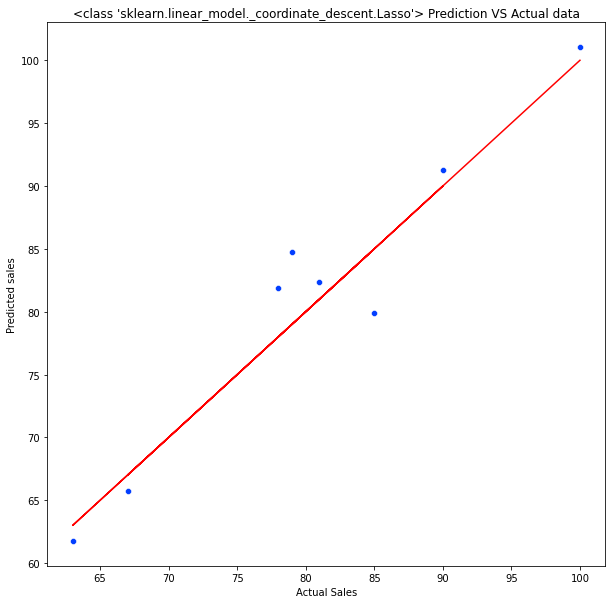

In [102]:
Reg_plot(las1,x_test,y_test)

* Save A model for future purpose

In [103]:
import joblib
joblib.dump(las1,"BasebalLas.pkl")

['BasebalLas.pkl']